In [127]:
# importing necessary liberaries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingClassifier


from sklearn.model_selection import GridSearchCV



In [128]:
# loading data
df=pd.read_csv('Campus_Recruitment_Data.csv')

In [129]:
nrows,ncols=df.shape
print(f"Number of rows {nrows} \nNumber of columns {ncols}")

Number of rows 10000 
Number of columns 15


In [130]:
# checking for random samples from the data

df.sample(4)

Unnamed: 0  StudentId  CGPA  Major Projects  Workshops/Certificatios  \
4348        4348       4349   8.0               2                        3   
8422        8422       8423   8.3               0                        1   
1883        1883       1884   7.4               1                        1   
3569        3569       3570   8.3               2                        3   

      Mini Projects  Skills  Communication Skill Rating Internship Hackathon  \
4348              2       9                         4.6        Yes       Yes   
8422              0       9                         4.1         No        No   
1883              0       6                         4.4         No        No   
3569              2       9                         4.8        Yes       Yes   

      12th Percentage  10th Percentage  backlogs PlacementStatus   salary  
4348               81               88         0          Placed  1200000  
8422               63               66         1       NotPlaced        0  
1883               57               66         2       NotPlaced        0  
3569               81               86         1          Placed  1150000

In [131]:
# renameing and removing unnecessary columns
df.rename(columns={'Communication Skill Rating':'communi_rating','Workshops/Certificatios':'workshops'},inplace=True)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [132]:
# checking for data type of columns that are in the dataset
df.dtypes

StudentId            int64
CGPA               float64
Major Projects       int64
workshops            int64
Mini Projects        int64
Skills               int64
communi_rating     float64
Internship          object
Hackathon           object
12th Percentage      int64
10th Percentage      int64
backlogs             int64
PlacementStatus     object
salary               int64
dtype: object

In [133]:
# checking statical summery
df.describe()

StudentId          CGPA  Major Projects     workshops  Mini Projects  \
count  10000.00000  10000.000000    10000.000000  10000.000000   10000.000000   
mean    5000.50000      7.698010        1.049200      2.026600       1.013200   
std     2886.89568      0.640131        0.665901      0.867968       0.904272   
min        1.00000      6.500000        0.000000      0.000000       0.000000   
25%     2500.75000      7.400000        1.000000      1.000000       0.000000   
50%     5000.50000      7.700000        1.000000      2.000000       1.000000   
75%     7500.25000      8.200000        1.000000      3.000000       2.000000   
max    10000.00000      9.100000        2.000000      3.000000       3.000000   

             Skills  communi_rating  12th Percentage  10th Percentage  \
count  10000.000000    10000.000000     10000.000000     10000.000000   
mean       7.555200        4.323960        69.159400        74.501500   
std        0.927922        0.411622        10.430459         8.919527   
min        6.000000        3.000000        55.000000        57.000000   
25%        7.000000        4.000000        59.000000        67.000000   
50%        8.000000        4.400000        70.000000        73.000000   
75%        8.000000        4.700000        78.000000        83.000000   
max        9.000000        4.800000        90.000000        88.000000   

          backlogs        salary  
count  10000.00000  1.000000e+04  
mean       1.73840  3.749350e+05  
std        1.39512  4.733645e+05  
min        0.00000  0.000000e+00  
25%        1.00000  0.000000e+00  
50%        1.00000  0.000000e+00  
75%        3.00000  9.000000e+05  
max        7.00000  1.300000e+06

In [134]:
# checking for the missing values in the data set
print("\nMissing Values Check:")
print(df.isnull().sum())


Missing Values Check:
StudentId          0
CGPA               0
Major Projects     0
workshops          0
Mini Projects      0
Skills             0
communi_rating     0
Internship         0
Hackathon          0
12th Percentage    0
10th Percentage    0
backlogs           0
PlacementStatus    0
salary             0
dtype: int64


In [135]:
# Encode categorical variables using the label encoder
le = preprocessing.LabelEncoder()
df['Internship'] = le.fit_transform(df['Internship'])
df['Hackathon'] = le.fit_transform(df['Hackathon'])
df['PlacementStatus'] = le.fit_transform(df['PlacementStatus'])  # Placed=1, NotPlaced=0

In [136]:
df.head()

StudentId  CGPA  Major Projects  workshops  Mini Projects  Skills  \
0          1   7.5               1          1              1       6   
1          2   8.9               0          3              2       9   
2          3   7.3               1          2              2       8   
3          4   7.5               1          1              2       8   
4          5   8.3               1          2              2       8   

   communi_rating  Internship  Hackathon  12th Percentage  10th Percentage  \
0             4.4           0          0               61               79   
1             4.0           1          1               78               82   
2             4.8           1          0               79               80   
3             4.4           1          1               81               80   
4             4.5           1          1               74               88   

   backlogs  PlacementStatus   salary  
0         2                0        0  
1         0                1  1000000  
2         2                0        0  
3         0                1   950000  
4         0                1   950000

In [137]:
df.head()

StudentId  CGPA  Major Projects  workshops  Mini Projects  Skills  \
0          1   7.5               1          1              1       6   
1          2   8.9               0          3              2       9   
2          3   7.3               1          2              2       8   
3          4   7.5               1          1              2       8   
4          5   8.3               1          2              2       8   

   communi_rating  Internship  Hackathon  12th Percentage  10th Percentage  \
0             4.4           0          0               61               79   
1             4.0           1          1               78               82   
2             4.8           1          0               79               80   
3             4.4           1          1               81               80   
4             4.5           1          1               74               88   

   backlogs  PlacementStatus   salary  
0         2                0        0  
1         0                1  1000000  
2         2                0        0  
3         0                1   950000  
4         0                1   950000

In [138]:
# duplicate rows
nduplicates=df.duplicated().sum()

if nduplicates>0:
  print("There are nduplicates rows in the dataset")
else:
  print("There are no duplicate rows in the dataset")

There are no duplicate rows in the dataset


In [139]:
# checking uniques value for each of the columns
for i in df.columns:
    print(f"{i} : {df[i].unique()}")

StudentId : [    1     2     3 ...  9998  9999 10000]
CGPA : [7.5 8.9 7.3 8.3 7.  7.7 6.5 7.8 7.9 7.4 8.6 8.2 6.8 7.6 6.7 8.4 8.5 6.9
 8.1 8.8 8.  6.6 7.2 7.1 8.7 9.  9.1]
Major Projects : [1 0 2]
workshops : [1 3 2 0]
Mini Projects : [1 2 0 3]
Skills : [6 9 8 7]
communi_rating : [4.4 4.  4.8 4.5 4.2 3.5 3.9 4.6 4.1 4.7 3.4 3.8 4.3 3.6 3.3 3.2 3.7 3.
 3.1]
Internship : [0 1]
Hackathon : [0 1]
12th Percentage : [61 78 79 81 74 55 62 59 75 85 82 71 84 63 72 58 77 56 68 76 64 66 60 65
 80 70 57 86 90 73 69 83 87 67 88 89]
10th Percentage : [79 82 80 88 66 65 72 71 86 87 83 73 78 63 75 69 57 61 85 68 81 84 60 67
 64 76 70 62 74 59 58 77]
backlogs : [2 0 4 3 1 7 5 6]
PlacementStatus : [0 1]
salary : [      0 1000000  950000  450000 1250000  400000  750000  550000 1100000
  500000 1200000 1150000 1050000  900000 1300000  800000  700000  850000]


In [140]:
df.fillna(0,inplace=True)

<Axes: ylabel='Frequency'>

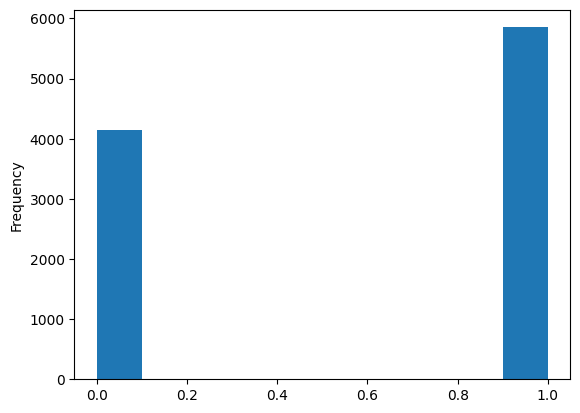

In [141]:
df["Internship"].plot(kind='hist')

<Axes: ylabel='Frequency'>

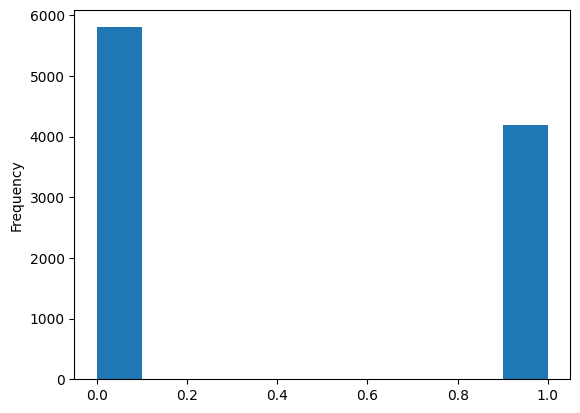

In [142]:
df["PlacementStatus"].plot(kind='hist')
# ALmost all half people are not placed

In [143]:
df.head()

StudentId  CGPA  Major Projects  workshops  Mini Projects  Skills  \
0          1   7.5               1          1              1       6   
1          2   8.9               0          3              2       9   
2          3   7.3               1          2              2       8   
3          4   7.5               1          1              2       8   
4          5   8.3               1          2              2       8   

   communi_rating  Internship  Hackathon  12th Percentage  10th Percentage  \
0             4.4           0          0               61               79   
1             4.0           1          1               78               82   
2             4.8           1          0               79               80   
3             4.4           1          1               81               80   
4             4.5           1          1               74               88   

   backlogs  PlacementStatus   salary  
0         2                0        0  
1         0                1  1000000  
2         2                0        0  
3         0                1   950000  
4         0                1   950000

In [144]:
df.head()

StudentId  CGPA  Major Projects  workshops  Mini Projects  Skills  \
0          1   7.5               1          1              1       6   
1          2   8.9               0          3              2       9   
2          3   7.3               1          2              2       8   
3          4   7.5               1          1              2       8   
4          5   8.3               1          2              2       8   

   communi_rating  Internship  Hackathon  12th Percentage  10th Percentage  \
0             4.4           0          0               61               79   
1             4.0           1          1               78               82   
2             4.8           1          0               79               80   
3             4.4           1          1               81               80   
4             4.5           1          1               74               88   

   backlogs  PlacementStatus   salary  
0         2                0        0  
1         0                1  1000000  
2         2                0        0  
3         0                1   950000  
4         0                1   950000

In [145]:
# checking for correlation between the columns
df.corr()['PlacementStatus']

StudentId          0.004294
CGPA               0.423131
Major Projects     0.260340
workshops          0.475186
Mini Projects      0.362268
Skills             0.515559
communi_rating     0.427284
Internship         0.482491
Hackathon          0.323659
12th Percentage    0.469763
10th Percentage    0.505746
backlogs          -0.751820
PlacementStatus    1.000000
salary             0.931406
Name: PlacementStatus, dtype: float64

Skills, Internship, 10th Percentage, and Workshops show moderate positive correlations with placement status, meaning these factors positively influence placement chances.
Backlogs has a strong negative correlation, indicating that more backlogs significantly reduce the likelihood of placement.
Salary is highly correlated with placement status, showing a strong relationship between getting placed and a higher salary.
Other factors such as CGPA and Communication Rating also moderately impact placement, but not as strongly as Skills or Workshops.

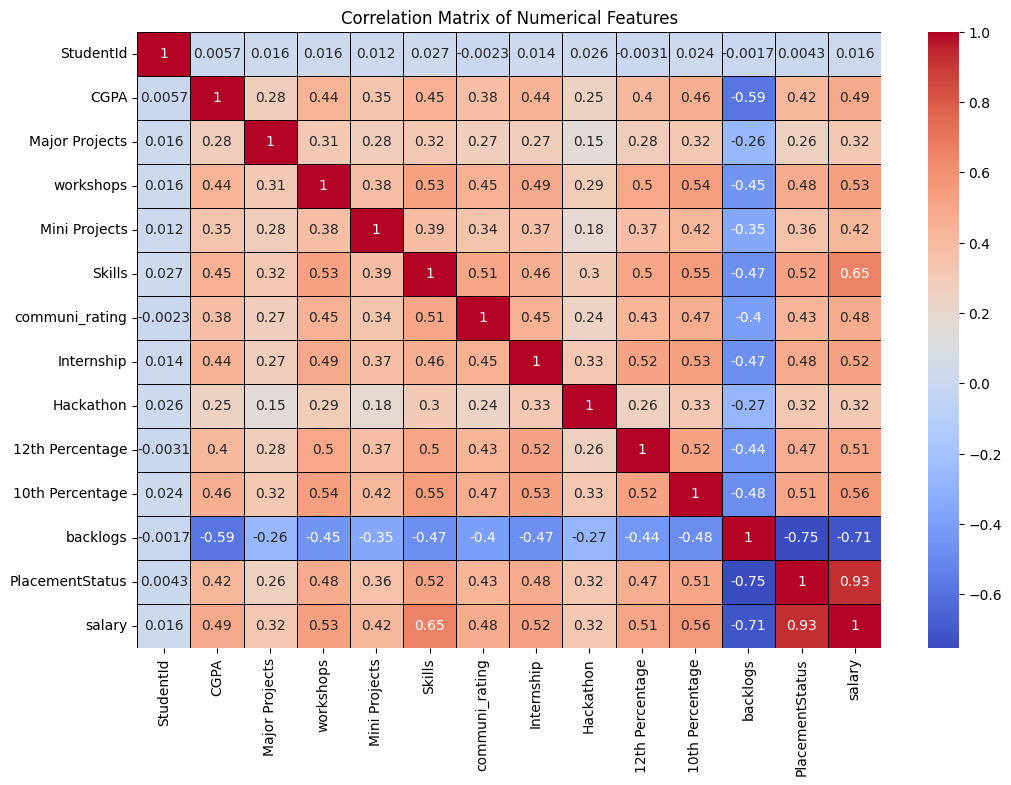

In [146]:
corr_matrix = df.corr()

# 2. Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

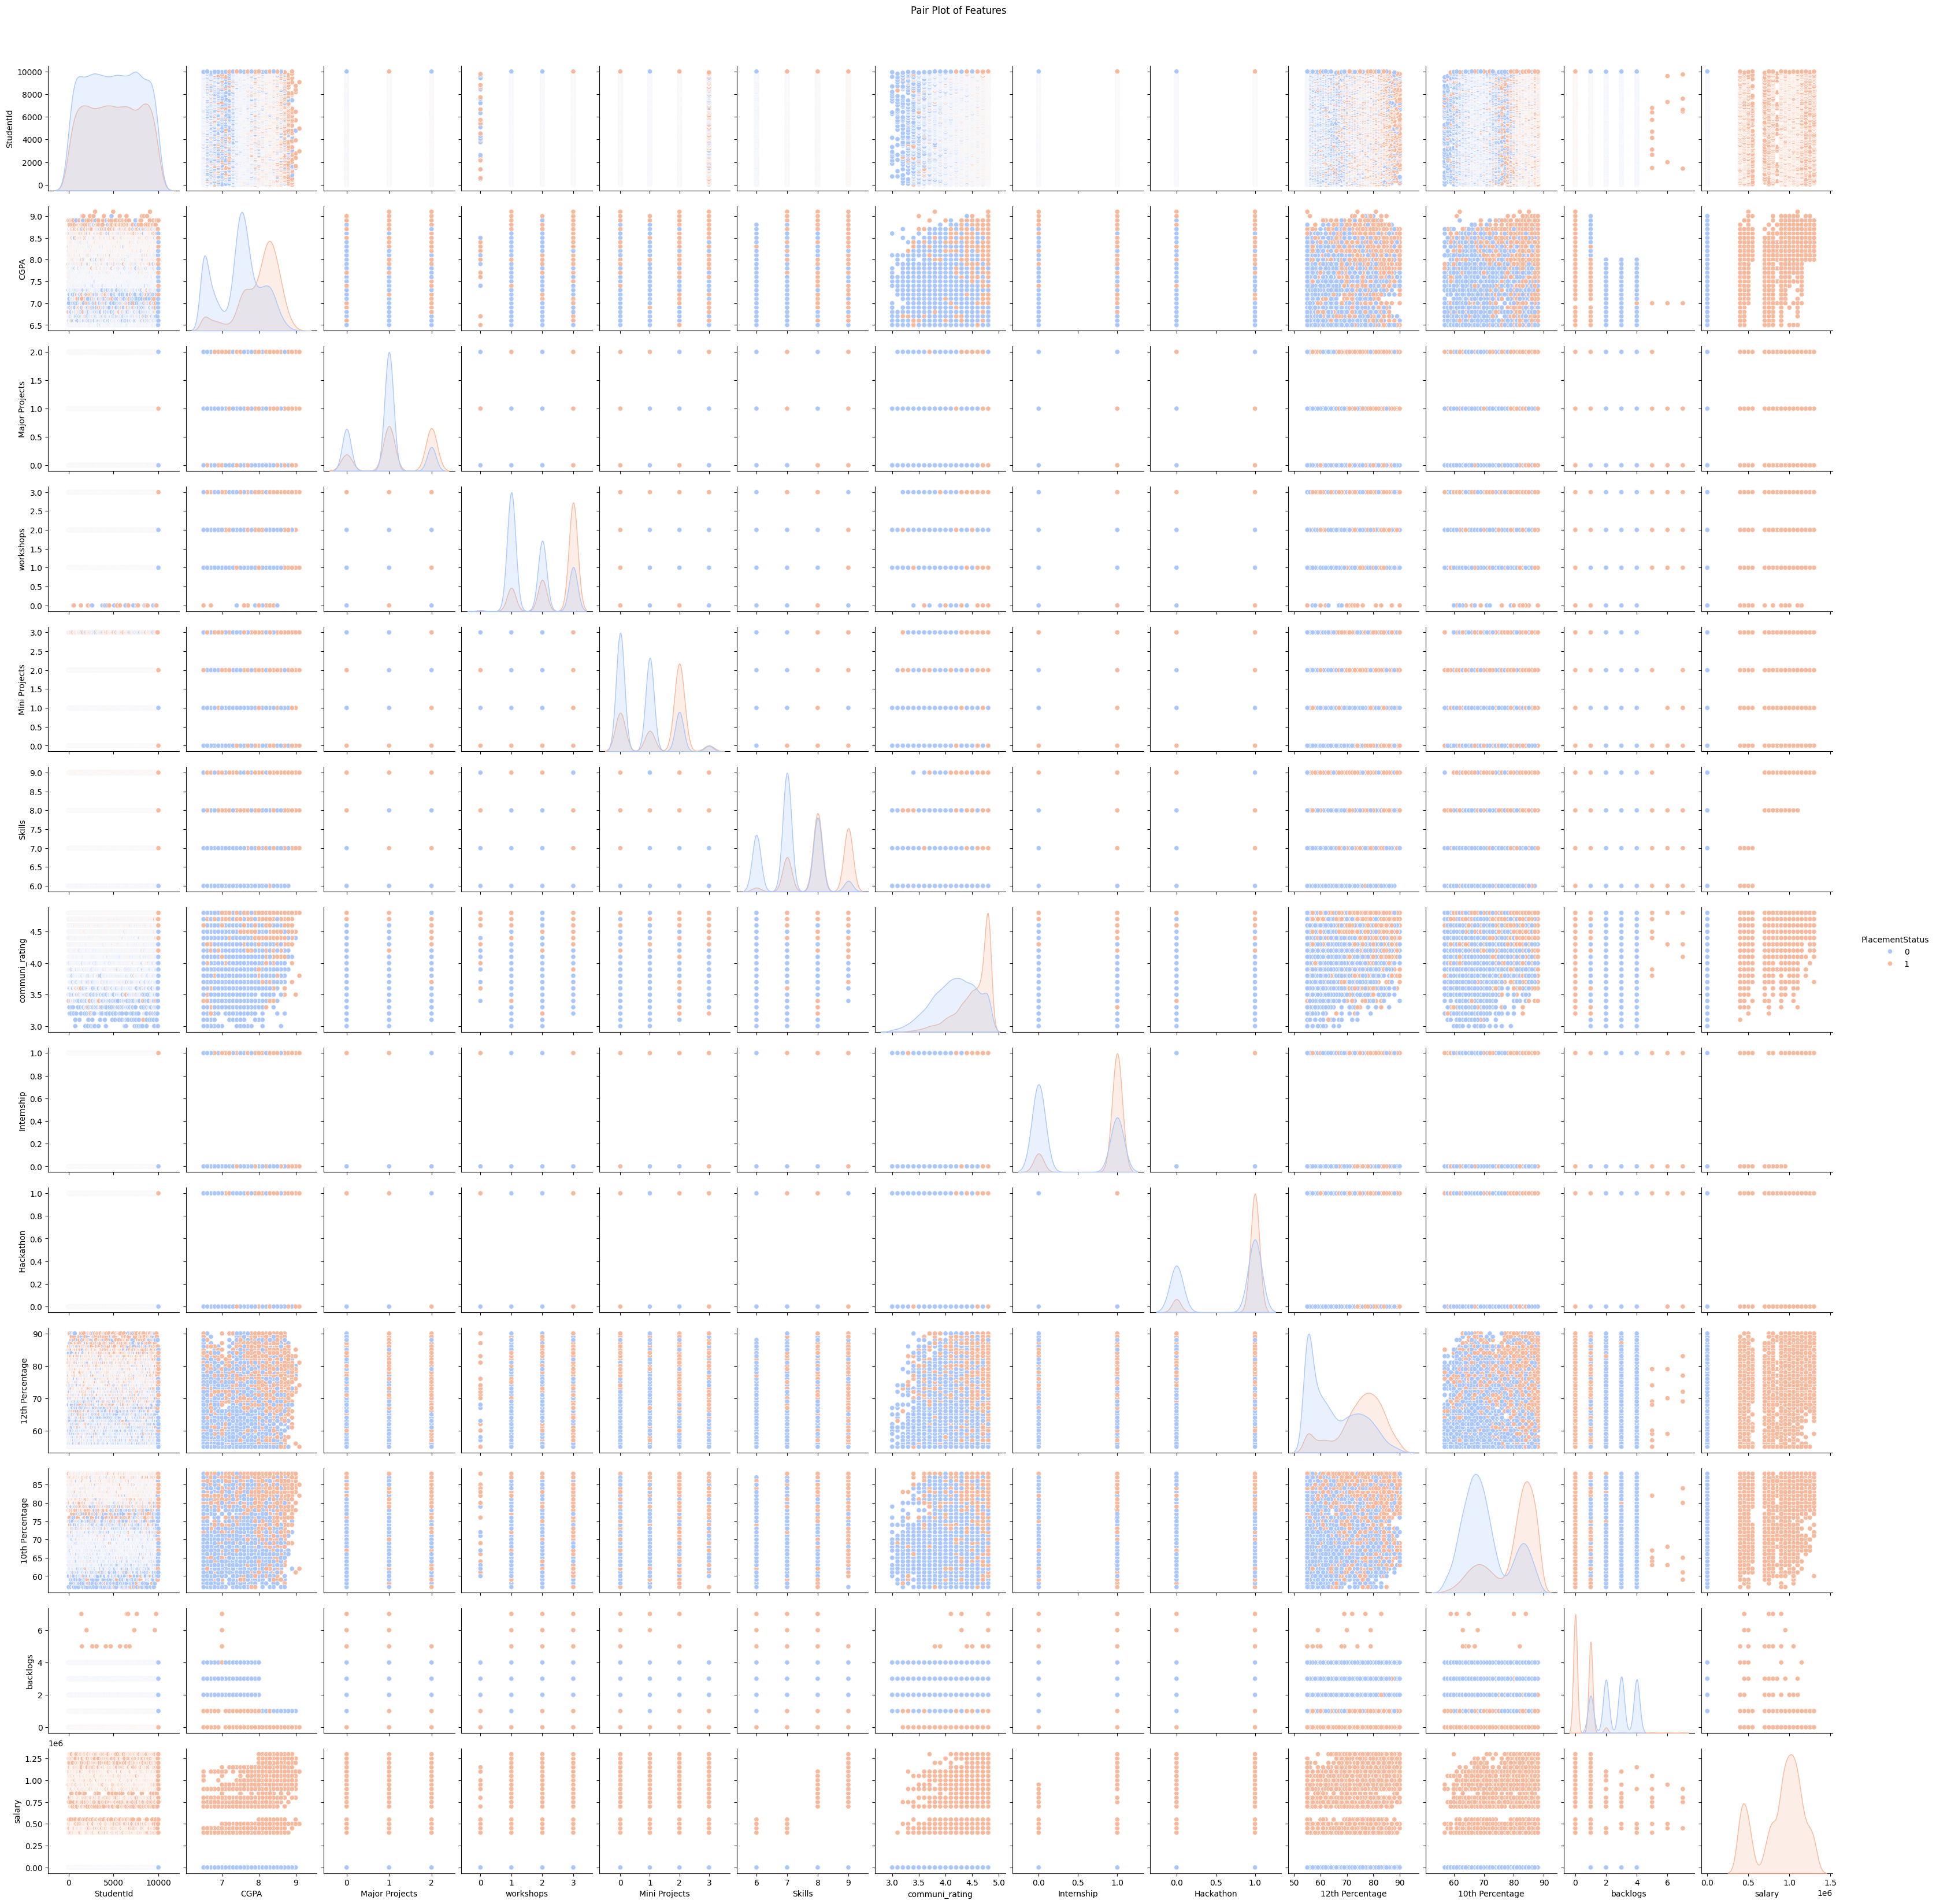

In [147]:
# pair plot to obserb the relationship between each individual vaiables with the target variables
sns.pairplot(df, diag_kind='kde', hue='PlacementStatus', palette='coolwarm')
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

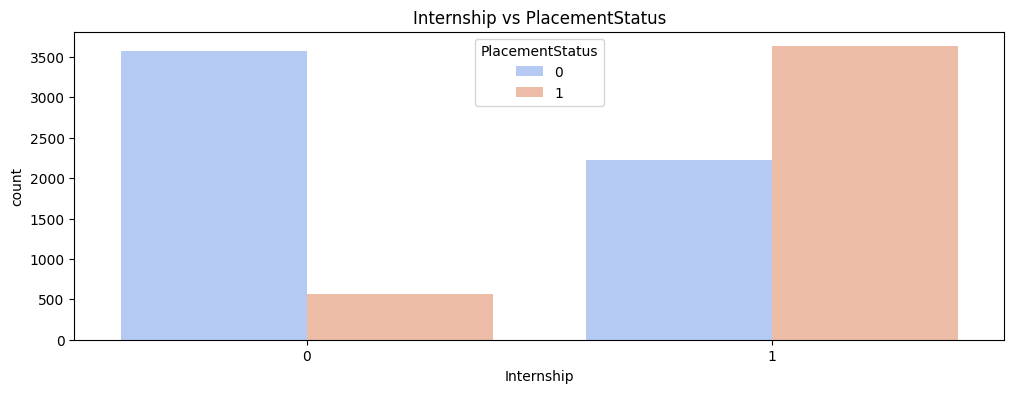

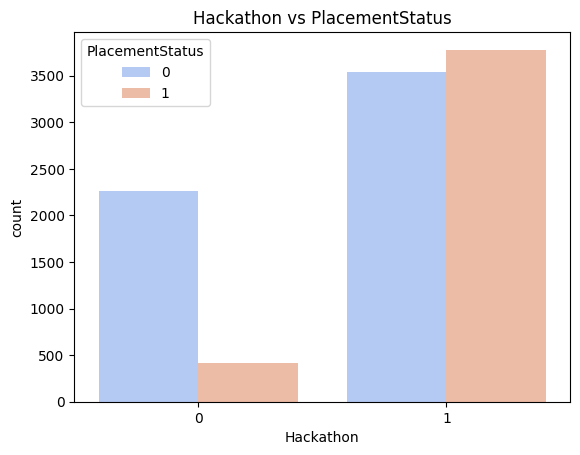

In [148]:
# Count plot for Internship vs PlacementStatus
plt.figure(figsize=(12, 4))
sns.countplot(x='Internship', hue='PlacementStatus', data=df, palette='coolwarm')
plt.title('Internship vs PlacementStatus')
plt.show()

# Count plot for Hackathon vs PlacementStatus
sns.countplot(x='Hackathon', hue='PlacementStatus', data=df, palette='coolwarm')
plt.title('Hackathon vs PlacementStatus')
plt.show()


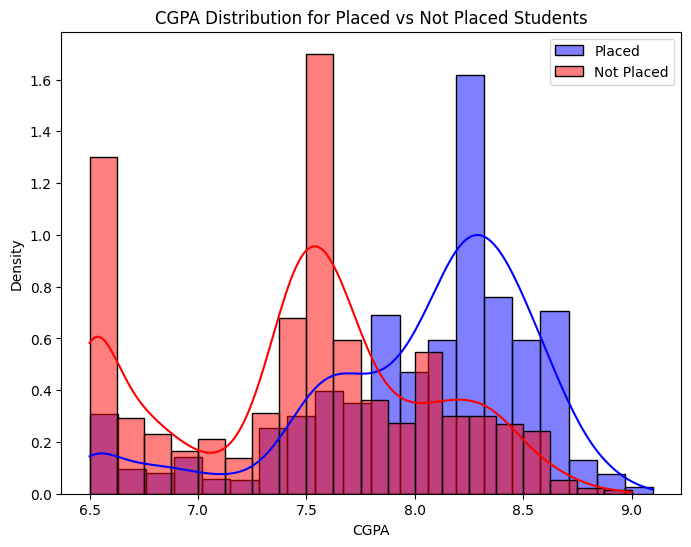

In [149]:
# Distribution of CGPA for Placed vs Not Placed
plt.figure(figsize=(8, 6))
sns.histplot(df[df['PlacementStatus'] == 1]['CGPA'], label='Placed', color='blue', kde=True, stat="density", bins=20)
sns.histplot(df[df['PlacementStatus'] == 0]['CGPA'], label='Not Placed', color='red', kde=True, stat="density", bins=20)
plt.title('CGPA Distribution for Placed vs Not Placed Students')
plt.legend()
plt.show()


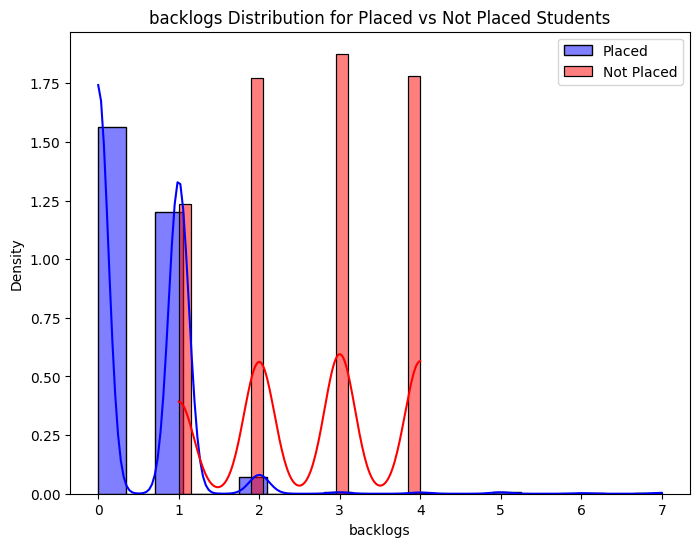

In [150]:
# Distribution of CGPA for Placed vs Not Placed
plt.figure(figsize=(8, 6))
sns.histplot(df[df['PlacementStatus'] == 1]['backlogs'], label='Placed', color='blue', kde=True, stat="density", bins=20)
sns.histplot(df[df['PlacementStatus'] == 0]['backlogs'], label='Not Placed', color='red', kde=True, stat="density", bins=20)
plt.title('backlogs Distribution for Placed vs Not Placed Students')
plt.legend()
plt.show()


<ipython-input-151-791dde029ce4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PlacementStatus', y='backlogs', data=df, palette='coolwarm')


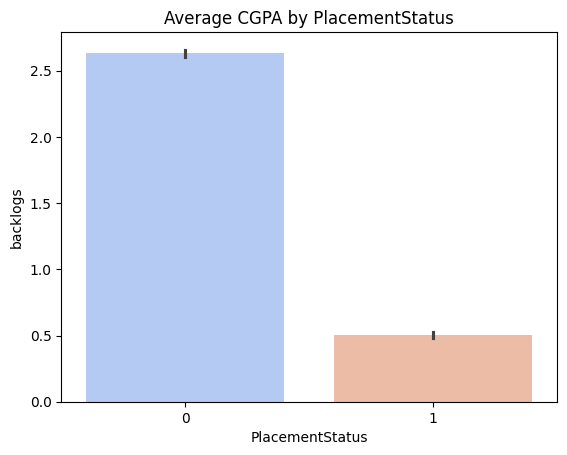

In [151]:
# Bar plot showing average CGPA for placed vs not placed students
sns.barplot(x='PlacementStatus', y='backlogs', data=df, palette='coolwarm')
plt.title('Average CGPA by PlacementStatus')
plt.show()

**Backlog** is the most affecting factor for the placement.

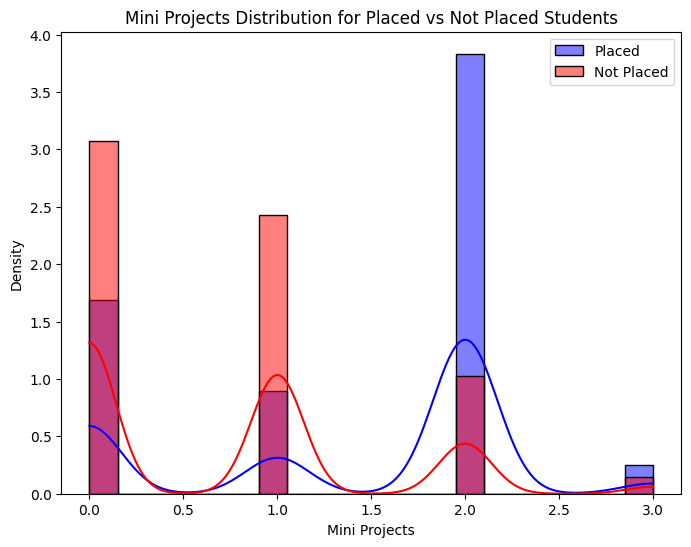

In [152]:
plt.figure(figsize=(8, 6))
sns.histplot(df[df['PlacementStatus'] == 1]['Mini Projects'], label='Placed', color='blue', kde=True, stat="density", bins=20)
sns.histplot(df[df['PlacementStatus'] == 0]['Mini Projects'], label='Not Placed', color='red', kde=True, stat="density", bins=20)
plt.title('Mini Projects Distribution for Placed vs Not Placed Students')
plt.legend()
plt.show()

<ipython-input-153-6d3af24e215d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PlacementStatus', y='CGPA', data=df, palette='coolwarm')


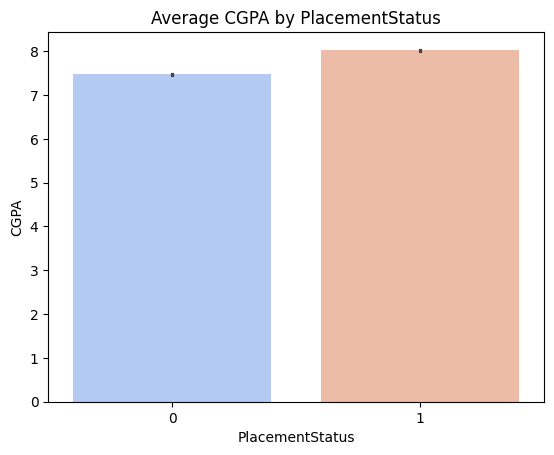

In [153]:
# Bar plot showing average CGPA for placed vs not placed students
sns.barplot(x='PlacementStatus', y='CGPA', data=df, palette='coolwarm')
plt.title('Average CGPA by PlacementStatus')
plt.show()

<ipython-input-154-81cdd62ae75e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PlacementStatus', y='Mini Projects', data=df, palette='coolwarm')


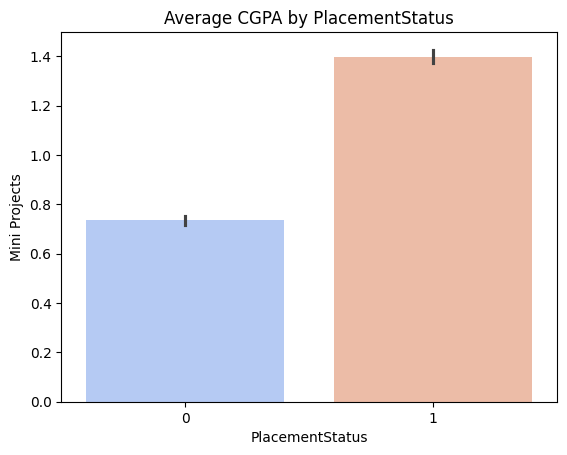

In [154]:
# Bar plot showing average CGPA for placed vs not placed students
sns.barplot(x='PlacementStatus', y='Mini Projects', data=df, palette='coolwarm')
plt.title('Average CGPA by PlacementStatus')
plt.show()

<ipython-input-155-8e7656c2579b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PlacementStatus', y='Hackathon', data=df, palette='coolwarm')


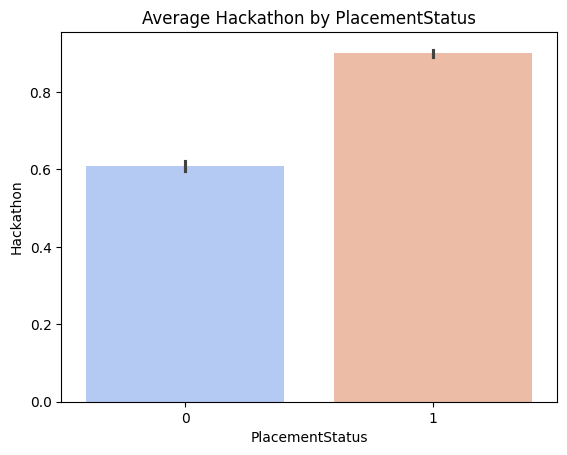

In [155]:
sns.barplot(x='PlacementStatus', y='Hackathon', data=df, palette='coolwarm')
plt.title('Average Hackathon by PlacementStatus')
plt.show()

<ipython-input-156-7eb6435fb4c3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PlacementStatus', y='Internship', data=df, palette='coolwarm')


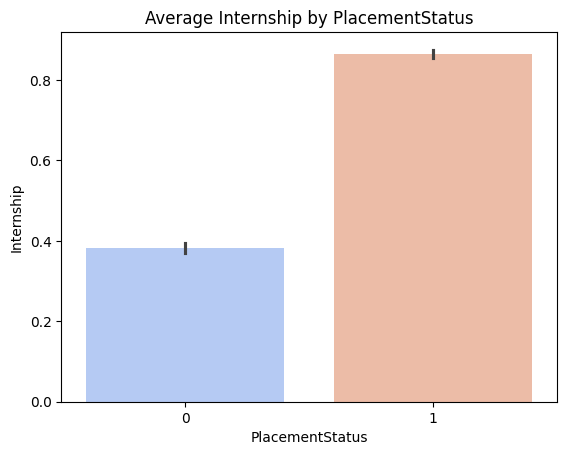

In [156]:
sns.barplot(x='PlacementStatus', y='Internship', data=df, palette='coolwarm')
plt.title('Average Internship by PlacementStatus')
plt.show()

In [157]:
'''
in this step we will be removing the following columns
1. StudentId, as heat map shows no correlation with PlacementStatus
2. PlacementStatus, it is the target variable
3. salary, salary is not the factor that affects the placement, it comes only after the placement
'''
x=df.drop(['StudentId','PlacementStatus','salary'],axis=1)

In [158]:
x

CGPA  Major Projects  workshops  Mini Projects  Skills  communi_rating  \
0      7.5               1          1              1       6             4.4   
1      8.9               0          3              2       9             4.0   
2      7.3               1          2              2       8             4.8   
3      7.5               1          1              2       8             4.4   
4      8.3               1          2              2       8             4.5   
...    ...             ...        ...            ...     ...             ...   
9995   7.5               1          1              2       7             3.9   
9996   7.4               0          1              0       9             4.8   
9997   8.4               1          3              0       7             4.8   
9998   8.9               0          3              2       8             4.8   
9999   8.4               0          1              1       6             3.8   

      Internship  Hackathon  12th Percentage  10th Percentage  backlogs  
0              0          0               61               79         2  
1              1          1               78               82         0  
2              1          0               79               80         2  
3              1          1               81               80         0  
4              1          1               74               88         0  
...          ...        ...              ...              ...       ...  
9995           1          0               85               66         4  
9996           0          0               84               67         1  
9997           1          1               79               81         0  
9998           1          1               71               85         0  
9999           0          0               62               66         1  

[10000 rows x 11 columns]

In [159]:
y = df['PlacementStatus']

In [160]:
y

0       0
1       1
2       0
3       1
4       1
       ..
9995    0
9996    1
9997    1
9998    1
9999    0
Name: PlacementStatus, Length: 10000, dtype: int64

In [161]:
y

0       0
1       1
2       0
3       1
4       1
       ..
9995    0
9996    1
9997    1
9998    1
9999    0
Name: PlacementStatus, Length: 10000, dtype: int64

In [162]:
x.head()

CGPA  Major Projects  workshops  Mini Projects  Skills  communi_rating  \
0   7.5               1          1              1       6             4.4   
1   8.9               0          3              2       9             4.0   
2   7.3               1          2              2       8             4.8   
3   7.5               1          1              2       8             4.4   
4   8.3               1          2              2       8             4.5   

   Internship  Hackathon  12th Percentage  10th Percentage  backlogs  
0           0          0               61               79         2  
1           1          1               78               82         0  
2           1          0               79               80         2  
3           1          1               81               80         0  
4           1          1               74               88         0

In [163]:
# spliting data into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

# Hyperparameter tuning, cross validation and model evaluation

In [164]:
# parameters from random forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# parameters Decision
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# parameters for KNeighbors
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}


In [165]:
# Initializing the models
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()

In [166]:
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', verbose=1)
grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy', verbose=1)
grid_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy', verbose=1)

In [167]:
grid_rf.fit(x_train, y_train)
ypred=grid_rf.predict(x_test)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [168]:
grid_dt.fit(x_train, y_train)
ypred=grid_dt.predict(x_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [169]:
grid_knn.fit(x_train, y_train)
ypred=grid_knn.predict(x_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [170]:
print("Best parameters for Random Forest: ", grid_rf.best_params_)
print("Best parameters for DecisionTreeClassifiert: ", grid_dt.best_params_)
print("Best parameters for KNeighborsClassifier: ", grid_knn.best_params_)

Best parameters for Random Forest:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best parameters for DecisionTreeClassifiert:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best parameters for KNeighborsClassifier:  {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [171]:
# Use best estimators
rf_best = grid_rf.best_estimator_
dt_best = grid_dt.best_estimator_
knn_best = grid_knn.best_estimator_


Best parameters for Random Forest:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best parameters for DecisionTreeClassifiert:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best parameters for KNeighborsClassifier:  {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}




In [172]:
classify = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
classify.fit(x_train, y_train)
ypred=classify.predict(x_test)

In [173]:
ypred

array([0, 0, 0, ..., 1, 0, 1])

In [174]:
ypred

array([0, 0, 0, ..., 1, 0, 1])

In [175]:
accuracy_score=metrics.accuracy_score(y_test,ypred)

In [176]:
accuracy_score

0.9363333333333334

In [177]:
confusion_metrix=metrics.confusion_matrix(y_test,ypred)

In [178]:
confusion_metrix

array([[1686,   88],
       [ 103, 1123]])

**True Negatives (TN)** = 1530
The model correctly predicted 1530 instances as Negative (when they were actually Negative).

**False Positives (FP)** = 244
The model incorrectly predicted 244 instances as Positive (when they were actually Negative). This is also known as a Type I error.

**False Negatives (FN)** = 96
The model incorrectly predicted 96 instances as Negative (when they were actually Positive). This is also known as a Type II error.

**True Positives (TP)** = 1130
The model correctly predicted 1130 instances as Positive (when they were actually Positive).

In [179]:
classification_report=metrics.classification_report(y_test,ypred,output_dict=True)

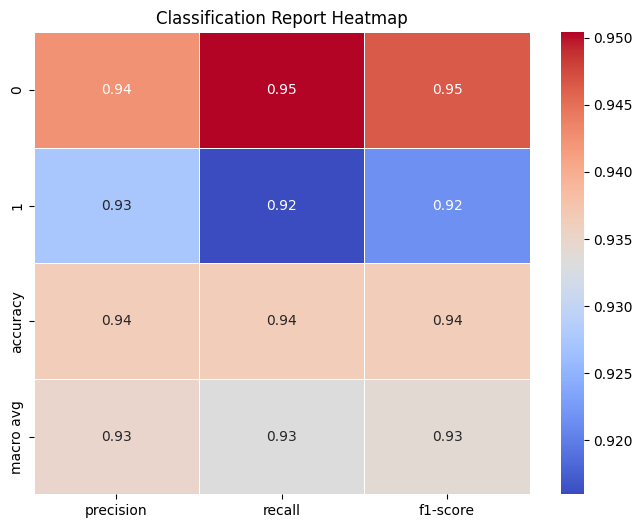

In [180]:
report_df = pd.DataFrame(classification_report).transpose()

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Classification Report Heatmap')
plt.show()

In [181]:
# classification_report
accuracy = classification_report['accuracy']  # Overall accuracy
precision = classification_report['weighted avg']['precision']  # Weighted precision
recall = classification_report['weighted avg']['recall']  # Weighted recall
f1_score = classification_report['weighted avg']['f1-score']  # Weighted F1-score
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")

Accuracy: 0.9363333333333334
Precision: 0.9362578675660677
Recall: 0.9363333333333334
F1-Score: 0.9362714119835189


In [182]:
importances = RandomForestClassifier.feature_importances_

In [183]:
importances = classify.feature_importances_

In [184]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

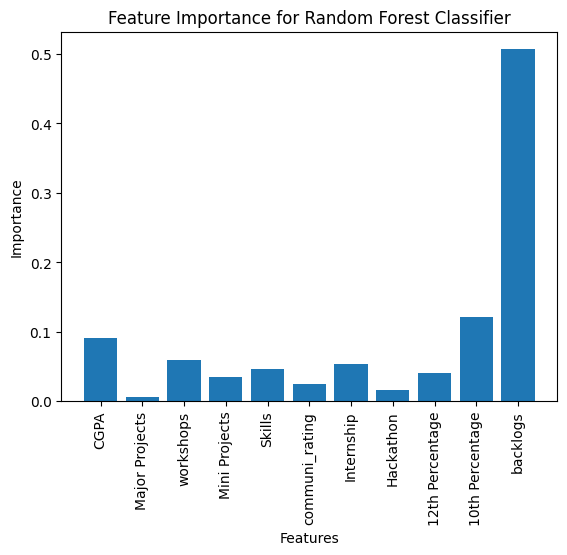

In [185]:
plt.bar(x.columns, importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance for Random Forest Classifier')
plt.xticks(rotation=90)
plt.show()

In [186]:
ypred_pob=classify.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, ypred_pob)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.9860333050718094

In [187]:
ypred_pob

array([0.02733292, 0.01712669, 0.49288593, ..., 0.59318949, 0.00624858,
       0.99162623])

In [188]:
roc_auc = metrics.auc(fpr,tpr)
roc_auc

0.9860333050718094

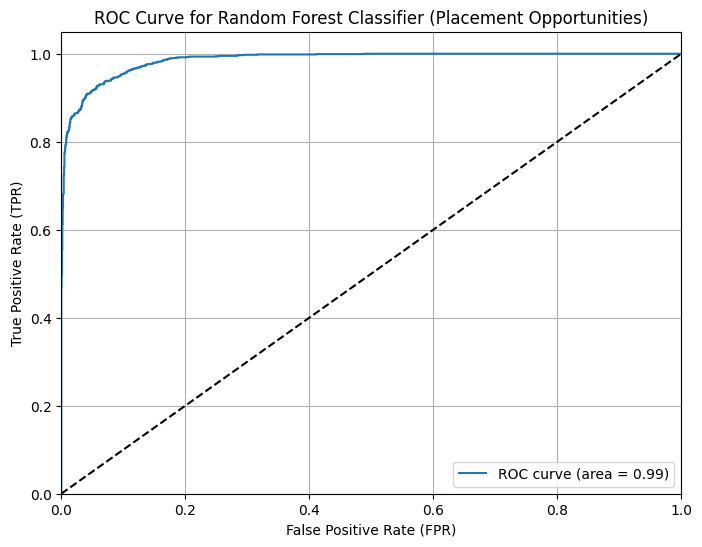

In [189]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %roc_auc )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest Classifier (Placement Opportunities)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [190]:
knn=KNeighborsClassifier(metric='manhattan', n_neighbors= 5, weights='distance')

In [191]:
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [192]:
ypred=knn.predict(x_test)

In [193]:
ypred

array([0, 0, 0, ..., 0, 0, 1])

In [194]:
accuracy_score=metrics.accuracy_score(y_test,ypred)

In [195]:
accuracy_score

0.8676666666666667

In [196]:
confusion_metrix=metrics.confusion_matrix(y_test,ypred)

In [197]:
confusion_metrix

array([[1565,  209],
       [ 188, 1038]])

True Negatives (TN) = 1552
False Positives (FP) = 222
False Negatives (FN) = 172
True Positives (TP) = 1054

In [198]:
classification_report=metrics.classification_report(y_test,ypred,output_dict=True)

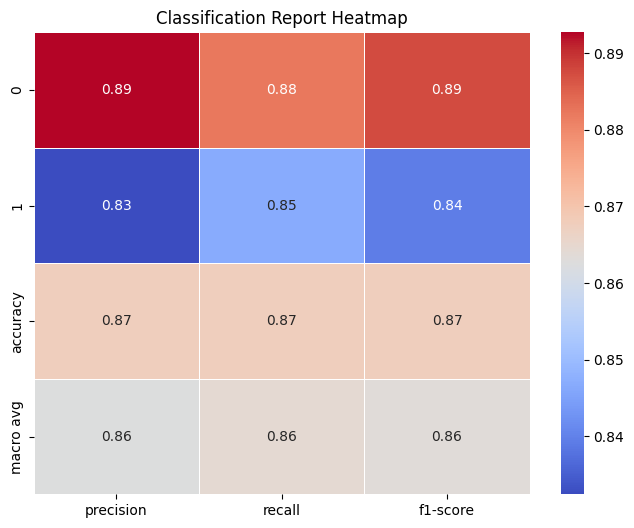

In [199]:
report_df = pd.DataFrame(classification_report).transpose()

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Classification Report Heatmap')
plt.show()

In [200]:
# classification_report
accuracy = classification_report['accuracy']  # Overall accuracy
precision = classification_report['weighted avg']['precision']  # Weighted precision
recall = classification_report['weighted avg']['recall']  # Weighted recall
f1_score = classification_report['weighted avg']['f1-score']  # Weighted F1-score
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")

Accuracy: 0.8676666666666667
Precision: 0.868089169321069
Recall: 0.8676666666666667
F1-Score: 0.8678345739697073


In [201]:
clf=DecisionTreeClassifier(criterion='gini', max_depth= 10, min_samples_leaf= 4, min_samples_split= 10)

In [202]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10)

In [203]:
ypred=clf.predict(x_test)

In [204]:
accuracy_score=metrics.accuracy_score(y_test,ypred)

In [205]:
accuracy_score

0.9353333333333333

In [206]:
confusion_metrix=metrics.confusion_matrix(y_test,ypred)

In [207]:
confusion_metrix

array([[1674,  100],
       [  94, 1132]])

True Negatives (TN) = 1653
False Positives (FP) = 121
False Negatives (FN) = 119
True Positives (TP) = 1107


In [208]:
classification_report=metrics.classification_report(y_test,ypred,output_dict=True)

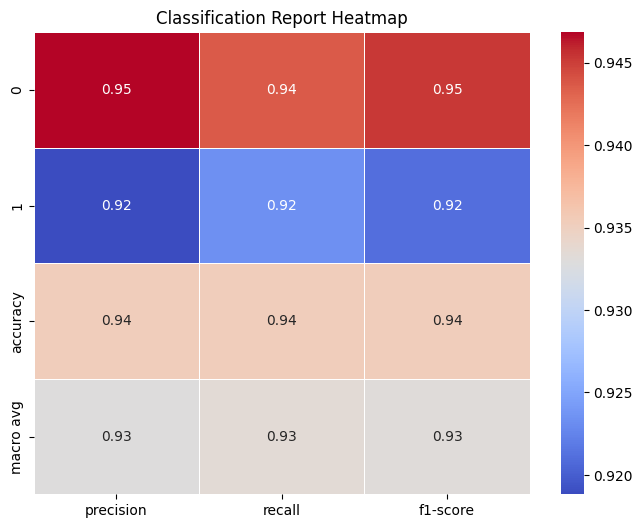

In [209]:
report_df = pd.DataFrame(classification_report).transpose()

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Classification Report Heatmap')
plt.show()

In [210]:
# classification_report
accuracy = classification_report['accuracy']  # Overall accuracy
precision = classification_report['weighted avg']['precision']  # Weighted precision
recall = classification_report['weighted avg']['recall']  # Weighted recall
f1_score = classification_report['weighted avg']['f1-score']  # Weighted F1-score
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")

Accuracy: 0.9353333333333333
Precision: 0.9353893361540421
Recall: 0.9353333333333333
F1-Score: 0.9353574879737544



 # Voting Classifier

In [211]:
# hard voting
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_best),
    ('dt', dt_best),
    ('knn', knn_best)], voting='hard')

In [212]:
# train the Voting Classifier
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=10,
                                                     min_samples_split=10,
                                                     n_estimators=200)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=10,
                                                     min_samples_leaf=4,
                                                     min_samples_split=10)),
                             ('knn',
                              KNeighborsClassifier(metric='manhattan',
                                                   weights='distance'))])

In [213]:
# predict using Voting Classifier
ypred_voting = voting_clf.predict(x_test)

In [214]:
ypred_voting

array([0, 0, 1, ..., 1, 0, 1])

In [215]:
y_test

8018    0
9225    0
3854    0
2029    0
3539    1
       ..
4208    1
5335    0
2554    1
13      0
4468    1
Name: PlacementStatus, Length: 3000, dtype: int64

In [216]:
# Calculate accuracy of the Voting Classifier
voting_accuracy = metrics.accuracy_score(y_test, ypred_voting)
print(f"Voting Classifier Accuracy: {voting_accuracy}")

Voting Classifier Accuracy: 0.9373333333333334


In [217]:
classification_report_voting = metrics.classification_report(y_test, ypred_voting)
print("Classification Report for Voting Classifier:\n", metrics.classification_report(y_test, ypred_voting))

Classification Report for Voting Classifier:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1774
           1       0.92      0.92      0.92      1226

    accuracy                           0.94      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.94      0.94      0.94      3000



In [218]:
# confusion matrix for Voting Classifier
confusion_voting = metrics.confusion_matrix(y_test, ypred_voting)
print(f"Confusion Matrix for Voting Classifier:\n {confusion_voting}")

Confusion Matrix for Voting Classifier:
 [[1679   95]
 [  93 1133]]


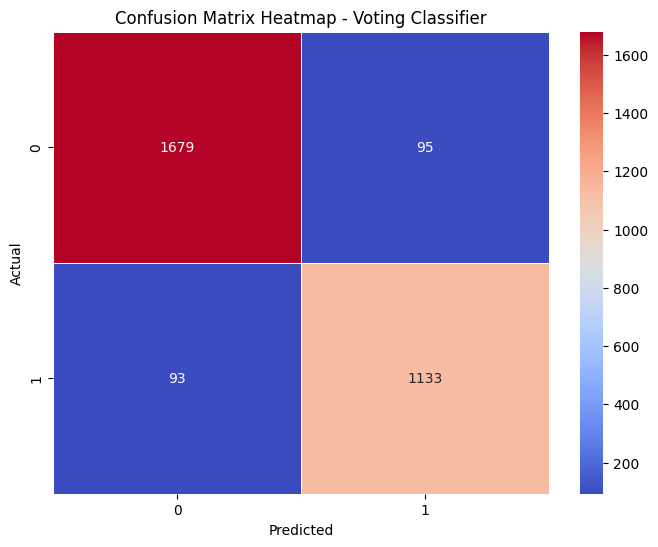

In [219]:
# plotting Confusion Matrix heatmap for Voting Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_voting, annot=True, cmap="coolwarm", fmt='d', linewidths=0.5)
plt.title('Confusion Matrix Heatmap - Voting Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [220]:
# compare performance with individual models
print(f"Random Forest Accuracy: {metrics.accuracy_score(y_test, rf_best.predict(x_test))}")
print(f"Decision Tree Accuracy: {metrics.accuracy_score(y_test, dt_best.predict(x_test))}")
print(f"KNN Accuracy: {metrics.accuracy_score(y_test, knn_best.predict(x_test))}")
print(f"Voting Classifier Accuracy: {voting_accuracy}")

# classification reports for individual models
print("Random Forest Classification Report:\n", metrics.classification_report(y_test, rf_best.predict(x_test)))
print("Decision Tree Classification Report:\n", metrics.classification_report(y_test, dt_best.predict(x_test)))
print("KNN Classification Report:\n", metrics.classification_report(y_test, knn_best.predict(x_test)))

Random Forest Accuracy: 0.9376666666666666
Decision Tree Accuracy: 0.9353333333333333
KNN Accuracy: 0.8676666666666667
Voting Classifier Accuracy: 0.9373333333333334
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      1774
           1       0.93      0.91      0.92      1226

    accuracy                           0.94      3000
   macro avg       0.94      0.93      0.94      3000
weighted avg       0.94      0.94      0.94      3000

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      1774
           1       0.92      0.92      0.92      1226

    accuracy                           0.94      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.94      0.94      0.94      3000

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.